In [1]:
!pip install numpy
!pip install cplex
!pip install qiskit-optimization

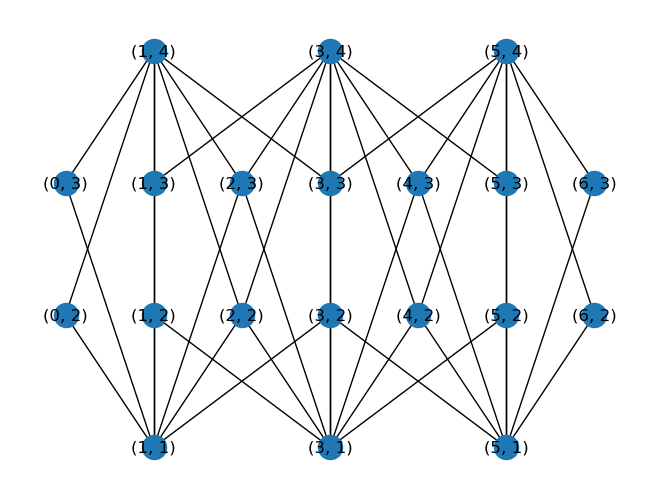

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()


points1 = [] #placement of lidars for one side
points2 = [] #placement of lidars for other side
points3 = [] #vertices to cover


for i in range(1, 6, 2):
    point = (i, 1)
    points1.append(point)

for i in range(1, 6, 2):
    point = (i, 4)
    points2.append(point)

for i in range(0, 7):
    for j in range(2, 4):
        point = (i, j)
        points3.append(point)

G.add_nodes_from(points1 + points2 + points3)


#edge that represents scope between lidar placement and vertices to cover
for node1 in points1:
  for j in range (node1[1]+1, node1[1]+3):
    if(j==node1[1]+1):
      for i in range(node1[0]-2, node1[0]+3):
        if (i,j) in points3:
          G.add_edge(tuple(node1), (i,j))
    if(j== node1[1]+2):
      for i in range(node1[0]-1, node1[0]+2):
        if (i,j) in points3:
          G.add_edge(tuple(node1), (i,j))
for node2 in points2:
  for j in range (node2[1]-2,node2[1]):
    if(j== node2[1]-2):
      for i in range(node2[0]-1, node2[0]+2):
        if (i,j) in points3:
          G.add_edge(tuple(node2), (i,j))
    if(j==node2[1]-1):
      for i in range(node2[0]-2, node2[0]+3):
        if (i,j) in points3:
          G.add_edge(tuple(node2), (i,j))
    

#Draw the graph

pos = {node: node for node in G.nodes()} 
nx.draw(G, pos, with_labels=True)

#plt.xlim(-1, 13)
#plt.ylim(-2, 7)

#plt.xticks(range(0, 13))
#plt.yticks(range(1, 7))

plt.show()


In [56]:
import os
from platform import node
import numpy as np
import qiskit_optimization
from docplex.mp.model import Model
from qiskit_optimization.problems import QuadraticProgram
import networkx as nx

# $x = O(V_1)$ $y = O(E)$

In [ ]:
m = Model(name='BMW')
pointsL = points1 + points2
x = m.binary_var_dict(pointsL, name='x')
m.objective_expr = sum(x[i] for i in pointsL) #minimize the placement of lidars
m.objective_sense = 'min'
#z = m.integer_var_dict(G.nodes(degree), name='z')
y = m.binary_var_dict(G.edges, name='y')
#constraint on edge covering all vertices (allows to ensure that at least one lidar covers the area)
for node in points3:
  degre = len(G.edges(node))
  invEdges = [(i[1], i[0]) for i in G.edges(node)]
  m.add_constraint(sum(y[i] for i in invEdges) <= degre)
  m.add_constraint(sum(y[i] for i in invEdges) >= 1)

#Link the relation between edge activation and lidar placement activation

for node in pointsL:
  m.add_constraint(sum(y[i] - x[node] for i in G.edges(node) if i[0] == node) == 0)

print(m.prettyprint())
m.export_as_lp(basename="BMW", path=os.path.abspath(""))
#dvar bool x[6];
#dvar bool y[44];




# $x = O(V_1)$ $y = O(V_2)$ $s = O(deg(V_2))$

In [30]:
m = Model(name='BMW')
pointsL = points1 + points2
x = m.binary_var_dict(pointsL, name='x')
m.objective_expr = sum(x[i] for i in pointsL) #minimize the placement of lidars
m.objective_sense = 'min'

max_deg = 0

for v in G.nodes():
    v_deg = G.degree[v]
    if max_deg <= v_deg:
        max_deg = v_deg

print(max_deg)

y = m.integer_var_dict(points3, name='y',lb=0, ub=max_deg)

#constraint on edge covering all vertices (allows to ensure that at least one lidar covers the area)
for node in points3:
    m.add_constraint(y[node] <= G.degree[node])
    m.add_constraint(y[node] >= 1)

#Link the relation between edge activation and lidar placement activation
for node in points3:
    m.add_constraint(y[node] == sum(x[v] for v in G.neighbors(node)))

print(m.prettyprint())
m.export_as_lp(basename="BMW", path=os.path.abspath(""))
#dvar bool x[6];
#dvar bool y[14];

8
// This file has been generated by DOcplex
// model name is: BMW
// var contrainer section
dvar bool x[6];
dvar int y[14];

minimize
 x_1_1 + x_3_1 + x_5_1 + x_1_4 + x_3_4 + x_5_4;
 
subject to {
 y_0_2 <= 2;
 y_0_2 >= 1;
 y_0_3 <= 2;
 y_0_3 >= 1;
 y_1_2 <= 3;
 y_1_2 >= 1;
 y_1_3 <= 3;
 y_1_3 >= 1;
 y_2_2 <= 4;
 y_2_2 >= 1;
 y_2_3 <= 4;
 y_2_3 >= 1;
 y_3_2 <= 4;
 y_3_2 >= 1;
 y_3_3 <= 4;
 y_3_3 >= 1;
 y_4_2 <= 4;
 y_4_2 >= 1;
 y_4_3 <= 4;
 y_4_3 >= 1;
 y_5_2 <= 3;
 y_5_2 >= 1;
 y_5_3 <= 3;
 y_5_3 >= 1;
 y_6_2 <= 2;
 y_6_2 >= 1;
 y_6_3 <= 2;
 y_6_3 >= 1;
 y_0_2 == x_1_1 + x_1_4;
 y_0_3 == x_1_1 + x_1_4;
 y_1_2 == x_1_1 + x_3_1 + x_1_4;
 y_1_3 == x_1_1 + x_1_4 + x_3_4;
 y_2_2 == x_1_1 + x_3_1 + x_1_4 + x_3_4;
 y_2_3 == x_1_1 + x_3_1 + x_1_4 + x_3_4;
 y_3_2 == x_1_1 + x_3_1 + x_5_1 + x_3_4;
 y_3_3 == x_3_1 + x_1_4 + x_3_4 + x_5_4;
 y_4_2 == x_3_1 + x_5_1 + x_3_4 + x_5_4;
 y_4_3 == x_3_1 + x_5_1 + x_3_4 + x_5_4;
 y_5_2 == x_3_1 + x_5_1 + x_5_4;
 y_5_3 == x_5_1 + x_3_4 + x_5_4;
 y_6_2 == 

'C:\\Users\\CYTech Student\\BMW.lp'

 # $x = O(V_1)$ $y = \sum(O(deg(V_2)))$

In [36]:
m = Model(name='BMW')
pointsL = points1 + points2
x = m.binary_var_dict(pointsL, name='x')
m.objective_expr = sum(x[i] for i in pointsL) #minimize the placement of lidars
m.objective_sense = 'min'

#max_deg = max(G.degree(v) for v in G.nodes())
#y = m.integer_var_dict(points3, lb=0, ub=max_deg, name='y')
y = [m.binary_var_dict(G.degree(node), name='z_'+str(node)) for node in points3]

#constraint on number of activate edge
for node in points3:
    m.add_constraint(sum(y[G.degree(node)].values()) >= 1)
    m.add_constraint(sum(y[G.degree(node)].values()) <= G.degree(node))

#constraint link active edge and node 
for node in points3:
    m.add_constraint(sum(y[G.degree(node)].values()) == sum(x[v] for v in G.neighbors(node)))

print(m.prettyprint())
m.export_as_lp(basename="BMW", path=os.path.abspath(""))
sol_model = m.solve()
m.print_solution()

# dvar bool x[6];
# dvar bool z_(0, 2)[2];
# dvar bool z_(0, 3)[2];
# dvar bool z_(1, 2)[3];
# dvar bool z_(1, 3)[3];
# dvar bool z_(2, 2)[4];
# dvar bool z_(2, 3)[4];
# dvar bool z_(3, 2)[4];
# dvar bool z_(3, 3)[4];
# dvar bool z_(4, 2)[4];
# dvar bool z_(4, 3)[4];
# dvar bool z_(5, 2)[3];
# dvar bool z_(5, 3)[3];
# dvar bool z_(6, 2)[2];
# dvar bool z_(6, 3)[2];
#44 z

// This file has been generated by DOcplex
// model name is: BMW
// var contrainer section
dvar bool x[6];
dvar bool z_(0, 2)[2];
dvar bool z_(0, 3)[2];
dvar bool z_(1, 2)[3];
dvar bool z_(1, 3)[3];
dvar bool z_(2, 2)[4];
dvar bool z_(2, 3)[4];
dvar bool z_(3, 2)[4];
dvar bool z_(3, 3)[4];
dvar bool z_(4, 2)[4];
dvar bool z_(4, 3)[4];
dvar bool z_(5, 2)[3];
dvar bool z_(5, 3)[3];
dvar bool z_(6, 2)[2];
dvar bool z_(6, 3)[2];

minimize
 x_1_1 + x_3_1 + x_5_1 + x_1_4 + x_3_4 + x_5_4;
 
subject to {
 z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 >= 1;
 z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 <= 2;
 z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 >= 1;
 z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 <= 2;
 z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 >= 1;
 z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 <= 3;
 z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 >= 1;
 z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 <= 3;
 z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 >= 1;
 z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 <= 4;
 z_(2,_2)_0 + z_(2,_2)_1 + z_(2,

In [44]:
sol_model = m.solve()
#m.print_solution()                                                                                                                                                                                                                          ()

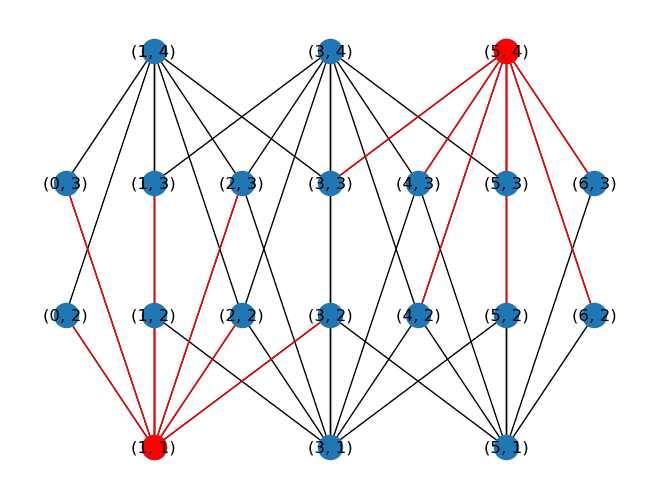

In [57]:
S = []
for (x, y) in sol_model.iter_var_values():
    sx = str(x)
    if sx[0] == 'x':
        S.append((int(sx[2]), int(sx[4])))
actE =[]
for node in S:
  for edge in G.edges(node):
    actE.append(edge)
# Draw the graph
pos = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True)

#plt.xlim(-2, 13)
#plt.ylim(-2, 7)

#plt.xticks(range(1, 13))
#plt.yticks(range(1, 7))
nx.draw_networkx_nodes(G, pos, S, node_color='red')
nx.draw_networkx_edges(G, pos, actE, edge_color='red')
plt.show()
#drawGraph()

In [39]:
quadratic_program = QuadraticProgram()
quadratic_program.read_from_lp_file(os.path.join(os.path.abspath(""), 'BMW.lp'))
print(quadratic_program.prettyprint())

#50 binary variables from the first program
#14 integer variables and 6 binary variable from the second program
#16 binary variables from the third program

Problem name: BMW

Minimize
  x_1_1 + x_1_4 + x_3_1 + x_3_4 + x_5_1 + x_5_4

Subject to
  Linear constraints (42)
    z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 >= 1  'c1'
    z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 <= 2  'c2'
    z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 >= 1  'c3'
    z_(1,_2)_0 + z_(1,_2)_1 + z_(1,_2)_2 <= 2  'c4'
    z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 >= 1  'c5'
    z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 <= 3  'c6'
    z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 >= 1  'c7'
    z_(1,_3)_0 + z_(1,_3)_1 + z_(1,_3)_2 <= 3  'c8'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 >= 1  'c9'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 <= 4  'c10'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 >= 1  'c11'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 <= 4  'c12'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 >= 1  'c13'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 <= 4  'c14'
    z_(2,_2)_0 + z_(2,_2)_1 + z_(2,_2)_2 + z_(2,_2)_3 >= 1  'c15'
    z_(2,

In [40]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.primitives import Sampler
from qiskit.algorithms.minimum_eigensolvers import QAOA
from qiskit.algorithms.optimizers import COBYLA

qaoa = QAOA(sampler=Sampler(), optimizer=COBYLA(), reps=2)

algorithm = MinimumEigenOptimizer(qaoa)
result = algorithm.solve(qp)#qp statt qubo
#print(result.min_eigen_solver_result)
print(result.prettyprint())

print("Decoded solution: " + str(conv.interpret(result.raw_samples[0].x)))

#ValueError: Maximum allowed dimension exceeded first/second/third program

ValueError: Maximum allowed dimension exceeded